# Capstone Project

In [1]:
## import libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import locale
from locale import atof

import requests
import json
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

!conda install -c conda-forge folium=0.5.0 --yes 
import folium

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge wikipedia --yes
import wikipedia as wp

import types
from botocore.client import Config
import ibm_boto3


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will

In [2]:
# import data file with city population and coordinates


def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_************************ = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='*********************************',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_*****************************.get_object(Bucket='applieddatasciencespecializationc-donotdelete-pr-ppmltukplsapuo',Key='1000_cities.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Unnamed: 0,Rank,City,State,Growth,Population,Coordinates
0,1,1,New York,New York,4.80%,"8,405,837","40.7127837, -74.0059413"
1,2,2,Los Angeles,California,4.80%,"3,884,307","34.0522342, -118.2436849"
2,3,3,Chicago,Illinois,-6.10%,"2,718,782","41.8781136, -87.6297982"
3,4,4,Houston,Texas,11%,"2,195,914","29.7604267, -95.3698028"
4,5,5,Philadelphia,Pennsylvania,2.60%,"1,553,165","39.9525839, -75.1652215"


In [3]:
# split coordinates and add two columns



new=df_data_1['Coordinates'].str.split(',', n=1, expand=True)
df_data_1['Latitude']=new[0]
df_data_1['Longitude']=new[1]
df=df_data_1
df.head()

,Unnamed: 0,Rank,City,State,Growth,Population,Coordinates,Latitude,Longitude
0,1,1,New York,New York,4.80%,"8,405,837","40.7127837, -74.0059413",40.7127837,-74.0059413
1,2,2,Los Angeles,California,4.80%,"3,884,307","34.0522342, -118.2436849",34.0522342,-118.2436849
2,3,3,Chicago,Illinois,-6.10%,"2,718,782","41.8781136, -87.6297982",41.8781136,-87.6297982
3,4,4,Houston,Texas,11%,"2,195,914","29.7604267, -95.3698028",29.7604267,-95.3698028
4,5,5,Philadelphia,Pennsylvania,2.60%,"1,553,165","39.9525839, -75.1652215",39.9525839,-75.1652215


In [4]:
# convert Latitude and Longitude from strings to float
# change population to integer


df[['Latitude','Longitude']]=df[['Latitude','Longitude']].astype(float)
locale.setlocale(locale.LC_NUMERIC, '')
df[['Population']]=df[['Population']].applymap(atof).astype(int)
df.head()

,Unnamed: 0,Rank,City,State,Growth,Population,Coordinates,Latitude,Longitude
0,1,1,New York,New York,4.80%,8405837,"40.7127837, -74.0059413",40.712784,-74.005941
1,2,2,Los Angeles,California,4.80%,3884307,"34.0522342, -118.2436849",34.052234,-118.243685
2,3,3,Chicago,Illinois,-6.10%,2718782,"41.8781136, -87.6297982",41.878114,-87.629798
3,4,4,Houston,Texas,11%,2195914,"29.7604267, -95.3698028",29.760427,-95.369803
4,5,5,Philadelphia,Pennsylvania,2.60%,1553165,"39.9525839, -75.1652215",39.952584,-75.165222


In [5]:
# remove column 0


df.drop(df.columns[[0]], axis=1, inplace=True)
df.head()

,Rank,City,State,Growth,Population,Coordinates,Latitude,Longitude
0,1,New York,New York,4.80%,8405837,"40.7127837, -74.0059413",40.712784,-74.005941
1,2,Los Angeles,California,4.80%,3884307,"34.0522342, -118.2436849",34.052234,-118.243685
2,3,Chicago,Illinois,-6.10%,2718782,"41.8781136, -87.6297982",41.878114,-87.629798
3,4,Houston,Texas,11%,2195914,"29.7604267, -95.3698028",29.760427,-95.369803
4,5,Philadelphia,Pennsylvania,2.60%,1553165,"39.9525839, -75.1652215",39.952584,-75.165222


In [6]:
# import wikipedia table with GDP data


wpage = wp.page("List of U.S. metropolitan areas by GDP").html().encode("UTF-8")
df_wpage = pd.read_html(wpage)[0]
df_wpage.drop(df_wpage.columns[[0]], axis=1, inplace=True)
df_wpage.columns=["City","GDP2017","GDP2016","GDP2015","GDP2014","GDP2013","GDP2012"]
df_wpage.drop([0],axis=0,inplace=True)
df_wpage.head()

,City,GDP2017,GDP2016,GDP2015,GDP2014,GDP2013,GDP2012
1,"New York-Newark-Jersey City, NY-NJ-PA (Metropo...",1717712,1662671,1618366,1542763,1477043,1439233
2,"Los Angeles-Long Beach-Anaheim, CA (Metropolit...",1043735,996432,967101,901980,852034,820863
3,"Chicago-Naperville-Elgin, IL-IN-WI (Metropolit...",679699,657589,639033,608805,585948,578016
4,"Dallas-Fort Worth-Arlington, TX (Metropolitan ...",535499,503667,491879,475929,448178,417065
5,"Washington-Arlington-Alexandria, DC-VA-MD-WV (...",529990,509599,491779,471254,459268,454224


In [7]:
# import data file with top 10 most visited cities


body = client_******************************.get_object(Bucket='applieddatasciencespecializationc-donotdelete-pr-ppmltukplsapuo',Key='most_visited_cities.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_top10=df_data_2
df_top10

,Rank,City,2018_Visitors
0,1,"New York, New York",59.7
1,2,"Chicago, Illinois",54.1
2,3,"Atlanta, Georgia",51.0
3,4,"Anaheim, California",48.2
4,5,"Orlando, Florida",48.0
5,6,"Los Angeles, California",47.3
6,7,"Las Vegas, Nevada",42.9
7,8,"Philadelphia, Pennsylvania",42.0
8,9,"San Diego, California",34.9
9,10,"San Francisco, California",25.0


In [8]:
# remove the state in the city column


df_top10['City'], df_top10['State']=df_top10['City'].str.split(",", 1).str
df_top10.drop(df_top10.columns[[-1]], axis=1, inplace=True)
df_top10

,Rank,City,2018_Visitors
0,1,New York,59.7
1,2,Chicago,54.1
2,3,Atlanta,51.0
3,4,Anaheim,48.2
4,5,Orlando,48.0
5,6,Los Angeles,47.3
6,7,Las Vegas,42.9
7,8,Philadelphia,42.0
8,9,San Diego,34.9
9,10,San Francisco,25.0


In [9]:
# create a top 10 city list


top10=df_top10['City'].tolist()
top10

['New York',
 'Chicago',
 'Atlanta',
 'Anaheim',
 'Orlando',
 'Los Angeles',
 'Las Vegas',
 'Philadelphia',
 'San Diego',
 'San Francisco']

In [10]:
# select only rows for top 10 cities in wiki table


df_wpage1=df_wpage[df_wpage['City'].str.contains('|'.join(top10))]
df_wpage1.reset_index(inplace=True, drop=True)
df_wpage1

,City,GDP2017,GDP2016,GDP2015,GDP2014,GDP2013,GDP2012
0,"New York-Newark-Jersey City, NY-NJ-PA (Metropo...",1717712,1662671,1618366,1542763,1477043,1439233
1,"Los Angeles-Long Beach-Anaheim, CA (Metropolit...",1043735,996432,967101,901980,852034,820863
2,"Chicago-Naperville-Elgin, IL-IN-WI (Metropolit...",679699,657589,639033,608805,585948,578016
3,"San Francisco-Oakland-Hayward, CA (Metropolita...",500701,475417,445124,413026,385451,366151
4,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD (M...",444975,431384,418605,400621,389787,370052
5,"Atlanta-Sandy Springs-Roswell, GA (Metropolita...",385542,369806,347604,326502,307750,291481
6,"San Diego-Carlsbad, CA (Metropolitan Statistic...",231845,222963,211807,204915,198312,189074
7,"Orlando-Kissimmee-Sanford, FL (Metropolitan St...",132448,128000,123054,115309,115249,103535
8,"Las Vegas-Henderson-Paradise, NV (Metropolitan...",112288,107452,103734,93742,90426,87098


In [11]:
# capture the city name only in the city column



for i, row in df_wpage1.iterrows():
    df_wpage1.loc[i,'City']=df_wpage1.loc[i,'City'].split('-')[0]

df_wpage1

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,City,GDP2017,GDP2016,GDP2015,GDP2014,GDP2013,GDP2012
0,New York,1717712,1662671,1618366,1542763,1477043,1439233
1,Los Angeles,1043735,996432,967101,901980,852034,820863
2,Chicago,679699,657589,639033,608805,585948,578016
3,San Francisco,500701,475417,445124,413026,385451,366151
4,Philadelphia,444975,431384,418605,400621,389787,370052
5,Atlanta,385542,369806,347604,326502,307750,291481
6,San Diego,231845,222963,211807,204915,198312,189074
7,Orlando,132448,128000,123054,115309,115249,103535
8,Las Vegas,112288,107452,103734,93742,90426,87098


In [12]:
# merge dataframes including city coordinates, population, GDP and number of visitors together, then drop unused columns



df_1=pd.merge(df_top10, df, on='City', how='left')
df_2=pd.merge(df_1, df_wpage1, on='City', how='left')
df_3=df_2
df_3.drop(['Rank_x','Rank_y','Growth','Coordinates','GDP2016','GDP2015','GDP2014','GDP2013','GDP2012'], axis=1, inplace=True)
df_3

,City,2018_Visitors,State,Population,Latitude,Longitude,GDP2017
0,New York,59.7,New York,8405837,40.712784,-74.005941,1717712.0
1,Chicago,54.1,Illinois,2718782,41.878114,-87.629798,679699.0
2,Atlanta,51.0,Georgia,447841,33.748995,-84.387982,385542.0
3,Anaheim,48.2,California,345012,33.835293,-117.914504,NaN
4,Orlando,48.0,Florida,255483,28.538335,-81.379237,132448.0
5,Los Angeles,47.3,California,3884307,34.052234,-118.243685,1043735.0
6,Las Vegas,42.9,Nevada,603488,36.169941,-115.139830,112288.0
7,Philadelphia,42.0,Pennsylvania,1553165,39.952584,-75.165222,444975.0
8,San Diego,34.9,California,1355896,32.715738,-117.161084,231845.0
9,San Francisco,25.0,California,837442,37.774929,-122.419415,500701.0


In [13]:
# re-arrange columns positions


col=['City','State','Population','2018_Visitors','GDP2017','Longitude','Latitude']
df_3=df_3[col]
df_3


,City,State,Population,2018_Visitors,GDP2017,Longitude,Latitude
0,New York,New York,8405837,59.7,1717712.0,-74.005941,40.712784
1,Chicago,Illinois,2718782,54.1,679699.0,-87.629798,41.878114
2,Atlanta,Georgia,447841,51.0,385542.0,-84.387982,33.748995
3,Anaheim,California,345012,48.2,NaN,-117.914504,33.835293
4,Orlando,Florida,255483,48.0,132448.0,-81.379237,28.538335
5,Los Angeles,California,3884307,47.3,1043735.0,-118.243685,34.052234
6,Las Vegas,Nevada,603488,42.9,112288.0,-115.139830,36.169941
7,Philadelphia,Pennsylvania,1553165,42.0,444975.0,-75.165222,39.952584
8,San Diego,California,1355896,34.9,231845.0,-117.161084,32.715738
9,San Francisco,California,837442,25.0,500701.0,-122.419415,37.774929


In [14]:
#  get coordinates of Kansas city which is approx. the central location of the US.


address = 'Kansas'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Kansas are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Kansas are 38.27312, -98.5821872.


In [15]:
# create map of US using latitude and longitude values of Kansas


map_US = folium.Map(location=[latitude, longitude], zoom_start=4)

# add markers to map
for lat, lng, label in zip(df_3['Latitude'], df_3['Longitude'], df_3['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_US)  
    
map_US


In [16]:
#  get coordinates of New York (first city of top 10)



city_latitude = df_3.loc[0, 'Latitude'] # neighborhood latitude value
city_longitude = df_3.loc[0, 'Longitude'] # neighborhood longitude value

city_name = df_3.loc[0, 'City'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(city_name, 
                                                               city_latitude, 
                                                               city_longitude))


Latitude and longitude values of New York are 40.7127837, -74.0059413.


In [41]:
#  Foursquare client id and secret



CLIENT_ID = '******************************' # your Foursquare ID
CLIENT_SECRET = '***********************************' # your Foursquare Secret
VERSION = '20190623'
#VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ******************************
CLIENT_SECRET:***********************************


In [42]:
# choose maximum 1000 venues per city and radius of 10km



LIMIT = 1000 # limit of number of venues returned by Foursquare API

radius = 10000 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    city_latitude, 
    city_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=******************************&client_secret=***********************************&v=20190623&ll=40.7127837,-74.0059413&radius=10000&limit=1000'

In [19]:
#   result object


results = requests.get(url).json()


In [20]:
# function that extracts the category of the venue


def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [21]:
# venues



venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()


,name,categories,lat,lng
0,The Bar Room at Temple Court,Hotel Bar,40.711448,-74.006802
1,Korin,Furniture / Home Store,40.714824,-74.009404
2,Arcade Bakery,Bakery,40.717072,-74.006605
3,Aire Ancient Baths,Spa,40.718141,-74.004941
4,9/11 Memorial North Pool,Memorial Site,40.712077,-74.013187


In [22]:

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))



100 venues were returned by Foursquare.


In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [24]:
# top 10 cities venues generation


city_venues = getNearbyVenues(names=df_3['City'],
                                   latitudes=df_3['Latitude'],
                                   longitudes=df_3['Longitude']
                                  )

New York
Chicago
Atlanta
Anaheim
Orlando
Los Angeles
Las Vegas
Philadelphia
San Diego
San Francisco


In [25]:
# group by venues



print(city_venues.shape)
city_venues.groupby('City').count()
print('There are {} uniques categories.'.format(len(city_venues['Venue Category'].unique())))

(1000, 7)
There are 208 uniques categories.


In [26]:
# one hot encoding
city_onehot = pd.get_dummies(city_venues[['Venue Category']], prefix="", prefix_sep="")

# add city column back to dataframe
city_onehot['City'] = city_venues['City'] 

# move city column to the first column
fixed_columns = [city_onehot.columns[-1]] + list(city_onehot.columns[:-1])
city_onehot = city_onehot[fixed_columns]

city_onehot.head()

,City,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beer Bar,Beer Garden,Beer Store,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Casino,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Dog Run,Donut Shop,Electronics Store,English Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flower Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Historic Site,History Museum,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Island,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Movie Theater,Museum,Music Venue,National Park,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Service,Pet Store,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pub,Public Art,Ramen Restaurant,Record Shop,Resort,Restaurant,Rock Club,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Club,State / Provincial Park,Stationery Store,Steakhouse,Storage Facility,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Tiki Bar,Toy / Game Store,Trail,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Wedding Hall,Whisky Bar,Wine Bar,Wine Shop,Winery,Yoga Studio,Zoo,Zoo Exhibit
0,New York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,New York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,New York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [27]:

city_onehot.shape


(1000, 209)

In [28]:
city_grouped = city_onehot.groupby('City').mean().reset_index()
city_grouped

,City,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beer Bar,Beer Garden,Beer Store,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Casino,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Dog Run,Donut Shop,Electronics Store,English Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flower Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Historic Site,History Museum,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Island,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Movie Theater,Museum,Music Venue,National Park,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Service,Pet Store,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pub,Public Art,Ramen Restaurant,Record Shop,Resort,Restaurant,Rock Club,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Club,State / Provincial Park,Stationery Store,Steakhouse,Storage Facility,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Tiki Bar,Toy / Game Store,Trail,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Wedding Hall,Whisky Bar,Wine Bar,Wine Shop,Winery,Yoga Studio,Zoo,Zoo Exhibit
0,Anaheim,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.03,0.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.04,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.03,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.01,0.01,0.00,0.00,0.00,0.02,0.13,0.31,0.01,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00
1,Atlanta,0.00,0.00,0.01,0.05,0.00,0.01,0.01,0.00,0.00,0.00,0.00,

In [29]:
city_grouped.shape

(10, 209)

In [30]:
# top 5 venues of cities




num_top_venues = 5

for hood in city_grouped['City']:
    print("----"+hood+"----")
    temp = city_grouped[city_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Anaheim----
                          venue  freq
0  Theme Park Ride / Attraction  0.31
1                    Theme Park  0.13
2         General Entertainment  0.04
3                         Hotel  0.03
4                  Burger Joint  0.03


----Atlanta----
                      venue  freq
0                     Trail  0.09
1       American Restaurant  0.05
2                      Park  0.05
3                   Brewery  0.04
4  Mediterranean Restaurant  0.03


----Chicago----
                     venue  freq
0                    Hotel  0.09
1                     Park  0.06
2  New American Restaurant  0.05
3                  Theater  0.05
4           Sandwich Place  0.03


----Las Vegas----
                 venue  freq
0     Sushi Restaurant  0.04
1           Steakhouse  0.04
2  American Restaurant  0.04
3               Casino  0.04
4              Theater  0.04


----Los Angeles----
            venue  freq
0     Coffee Shop  0.08
1  Ice Cream Shop  0.05
2         Theater  0.05
3     

In [31]:

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [32]:
# top 10 venues of cities


num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = city_grouped['City']

for ind in np.arange(city_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(city_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anaheim,Theme Park Ride / Attraction,Theme Park,General Entertainment,Gift Shop,Hotel,Burger Joint,Art Gallery,American Restaurant,Wine Bar,Sandwich Place
1,Atlanta,Trail,Park,American Restaurant,Brewery,Mexican Restaurant,Mediterranean Restaurant,Dessert Shop,Beer Bar,History Museum,Beer Store
2,Chicago,Hotel,Park,Theater,New American Restaurant,Grocery Store,Boat or Ferry,Sandwich Place,Italian Restaurant,Coffee Shop,Seafood Restaurant
3,Las Vegas,Casino,American Restaurant,Steakhouse,Sushi Restaurant,Theater,Hotel,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,Seafood Restaurant
4,Los Angeles,Coffee Shop,Ice Cream Shop,Theater,Brewery,Taco Place,Bookstore,Sushi Restaurant,Art Gallery,Music Venue,Park
5,New York,Park,Bookstore,Bakery,Scenic Lookout,Yoga Studio,Gym,Ice Cream Shop,Italian Restaurant,Cycle Studio,Theater
6,Orlando,American Restaurant,Bar,Café,Sushi Restaurant,Theater,Asian Restaurant,Wine Bar,Park,Speakeasy,Convenience Store
7,Philadelphia,Coffee Shop,Pizza Place,Steakhouse,New American Restaurant,Wine Bar,Indian Restaurant,Art Museum,Mediterranean Restaurant,Bar,Breakfast Spot
8,San Diego,Zoo Exhibit,Park,Hotel,Seafood Restaurant,Sushi Restaurant,Mexican Restaurant,American Restaurant,Vegetarian / Vegan Restaurant,New American Restaurant,Steakhouse
9,San Francisco,Yoga Studio,Ice Cream Shop,Coffee Shop,Grocery Store,Park,Art Museum,Theater,Wine Shop,Bakery,Bookstore


In [33]:
# K-means clustering




# set number of clusters
kclusters = 3

city_grouped_clustering = city_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(city_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([1, 2, 2, 2, 2, 0, 2, 2, 2, 0], dtype=int32)

In [34]:
# add clustering labels
city_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

city_merged = df_3

# merge city_grouped with df_3 to add latitude/longitude for each city
city_merged = city_merged.join(city_venues_sorted.set_index('City'), on='City')

city_merged # check the last columns!

,City,State,Population,2018_Visitors,GDP2017,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,New York,New York,8405837,59.7,1717712.0,-74.005941,40.712784,0,Park,Bookstore,Bakery,Scenic Lookout,Yoga Studio,Gym,Ice Cream Shop,Italian Restaurant,Cycle Studio,Theater
1,Chicago,Illinois,2718782,54.1,679699.0,-87.629798,41.878114,2,Hotel,Park,Theater,New American Restaurant,Grocery Store,Boat or Ferry,Sandwich Place,Italian Restaurant,Coffee Shop,Seafood Restaurant
2,Atlanta,Georgia,447841,51.0,385542.0,-84.387982,33.748995,2,Trail,Park,American Restaurant,Brewery,Mexican Restaurant,Mediterranean Restaurant,Dessert Shop,Beer Bar,History Museum,Beer Store
3,Anaheim,California,345012,48.2,NaN,-117.914504,33.835293,1,Theme Park Ride / Attraction,Theme Park,General Entertainment,Gift Shop,Hotel,Burger Joint,Art Gallery,American Restaurant,Wine Bar,Sandwich Place
4,Orlando,Florida,255483,48.0,132448.0,-81.379237,28.538335,2,American Restaurant,Bar,Café,Sushi Restaurant,Theater,Asian Restaurant,Wine Bar,Park,Speakeasy,Convenience Store
5,Los Angeles,California,3884307,47.3,1043735.0,-118.243685,34.052234,2,Coffee Shop,Ice Cream Shop,Theater,Brewery,Taco Place,Bookstore,Sushi Restaurant,Art Gallery,Music Venue,Park
6,Las Vegas,Nevada,603488,42.9,112288.0,-115.139830,36.169941,2,Casino,American Restaurant,Steakhouse,Sushi Restaurant,Theater,Hotel,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,Seafood Restaurant
7,Philadelphia,Pennsylvania,1553165,42.0,444975.0,-75.165222,39.952584,2,Coffee Shop,Pizza Place,Steakhouse,New American Restaurant,Wine Bar,Indian Restaurant,Art Museum,Mediterranean Restaurant,Bar,Breakfast Spot
8,San Diego,California,1355896,34.9,231845.0,-117.161084,32.715738,2,Zoo Exhibit,Park,Hotel,Seafood Restaurant,Sushi Restaurant,Mexican Restaurant,American Restaurant,Vegetarian / Vegan Restaurant,New American Restaurant,Steakhouse
9,San Francisco,California,837442,25.0,500701.0,-122.419415,37.774929,0,Yoga Studio,Ice Cream Shop,Coffee Shop,Grocery Store,Park,Art Museum,Theater,Wine Shop,Bakery,Bookstore


In [35]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(city_merged['Latitude'], city_merged['Longitude'], city_merged['City'], city_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [36]:
# first cluster

city_merged.loc[city_merged['Cluster Labels'] == 0, city_merged.columns[[0,1] + list(range(5, city_merged.shape[1]))]]


,City,State,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,New York,New York,-74.005941,40.712784,0,Park,Bookstore,Bakery,Scenic Lookout,Yoga Studio,Gym,Ice Cream Shop,Italian Restaurant,Cycle Studio,Theater
9,San Francisco,California,-122.419415,37.774929,0,Yoga Studio,Ice Cream Shop,Coffee Shop,Grocery Store,Park,Art Museum,Theater,Wine Shop,Bakery,Bookstore


In [37]:
# second cluster

city_merged.loc[city_merged['Cluster Labels'] == 1, city_merged.columns[[0,1] + list(range(5, city_merged.shape[1]))]]

,City,State,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Anaheim,California,-117.914504,33.835293,1,Theme Park Ride / Attraction,Theme Park,General Entertainment,Gift Shop,Hotel,Burger Joint,Art Gallery,American Restaurant,Wine Bar,Sandwich Place


In [38]:
# third cluster

city_merged.loc[city_merged['Cluster Labels'] == 2, city_merged.columns[[0,1] + list(range(5, city_merged.shape[1]))]]

,City,State,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chicago,Illinois,-87.629798,41.878114,2,Hotel,Park,Theater,New American Restaurant,Grocery Store,Boat or Ferry,Sandwich Place,Italian Restaurant,Coffee Shop,Seafood Restaurant
2,Atlanta,Georgia,-84.387982,33.748995,2,Trail,Park,American Restaurant,Brewery,Mexican Restaurant,Mediterranean Restaurant,Dessert Shop,Beer Bar,History Museum,Beer Store
4,Orlando,Florida,-81.379237,28.538335,2,American Restaurant,Bar,Café,Sushi Restaurant,Theater,Asian Restaurant,Wine Bar,Park,Speakeasy,Convenience Store
5,Los Angeles,California,-118.243685,34.052234,2,Coffee Shop,Ice Cream Shop,Theater,Brewery,Taco Place,Bookstore,Sushi Restaurant,Art Gallery,Music Venue,Park
6,Las Vegas,Nevada,-115.139830,36.169941,2,Casino,American Restaurant,Steakhouse,Sushi Restaurant,Theater,Hotel,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,Seafood Restaurant
7,Philadelphia,Pennsylvania,-75.165222,39.952584,2,Coffee Shop,Pizza Place,Steakhouse,New American Restaurant,Wine Bar,Indian Restaurant,Art Museum,Mediterranean Restaurant,Bar,Breakfast Spot
8,San Diego,California,-117.161084,32.715738,2,Zoo Exhibit,Park,Hotel,Seafood Restaurant,Sushi Restaurant,Mexican Restaurant,American Restaurant,Vegetarian / Vegan Restaurant,New American Restaurant,Steakhouse


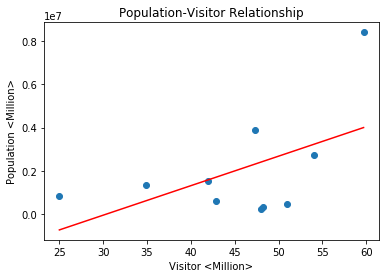

In [39]:
# Linear Regression - Population with Visitor


X = df_3.iloc[:, 3].values.reshape(-1, 1)
Y = df_3.iloc[:, 2].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Visitor <Million>')
plt.ylabel('Population <Million>')
plt.title("Population-Visitor Relationship")
plt.show()

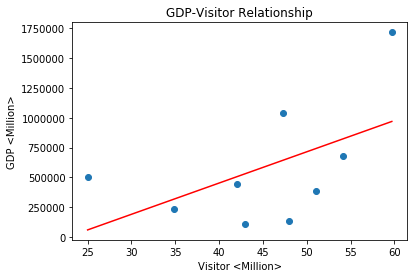

In [40]:
# Linear Regression - GDP with Visitor


df_4=df_3.dropna() # because one city without GDP data available

X = df_4.iloc[:, 3].values.reshape(-1, 1)
Y = df_4.iloc[:, 4].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Visitor <Million>')
plt.ylabel('GDP <Million>')
plt.title("GDP-Visitor Relationship")
plt.show()
